In [1]:
# Generating Random Data

import pandas as pd
import numpy as np

# Define regions
regions = ['North', 'South', 'East', 'West']

# Define product categories
product_categories = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat', 'Snacks']

# Define population density levels
population_densities = ['High', 'Medium', 'Low']

# Define income levels
income_levels = ['High', 'Medium', 'Low']

# Define climate types
climate_types = ['Tropical', 'Temperate', 'Continental', 'Polar']

# Define seasons
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Generate random dataset
data = []
for region in regions:
    for category in product_categories:
        for density in population_densities:
            for income in income_levels:
                for climate in climate_types:
                    for season in seasons:
                        sales = np.random.randint(1000, 10000)
                        data.append([region, category, density, income, climate, season, sales])

df = pd.DataFrame(data, columns=['Region', 'Product Category', 'Population Density', 'Income Level', 'Climate', 'Season', 'Sales'])
df.to_csv('food_consumption.csv', index=False)
print("Random dataset generated and saved as 'food_consumption.csv'")

Random dataset generated and saved as 'food_consumption.csv'


  Region Product Category Population Density Income Level    Climate  Season  \
0  North           Fruits               High         High   Tropical  Spring   
1  North           Fruits               High         High   Tropical  Summer   
2  North           Fruits               High         High   Tropical  Autumn   
3  North           Fruits               High         High   Tropical  Winter   
4  North           Fruits               High         High  Temperate  Spring   

   Sales  
0   1081  
1   9497  
2   6559  
3   8934  
4   3241  
             Sales
count  3456.000000
mean   5434.865741
std    2597.824315
min    1004.000000
25%    3213.000000
50%    5409.000000
75%    7665.000000
max    9993.000000


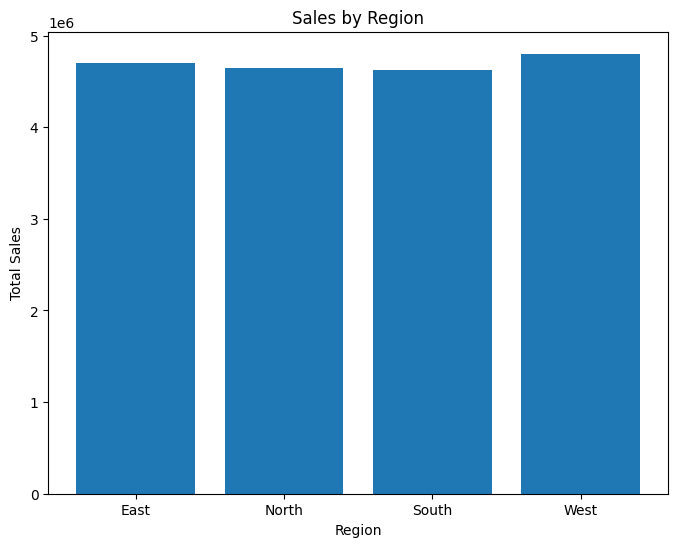

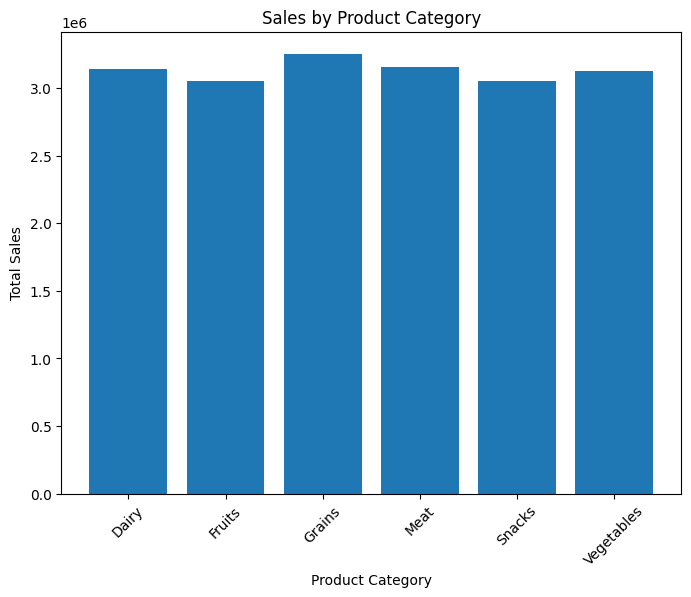

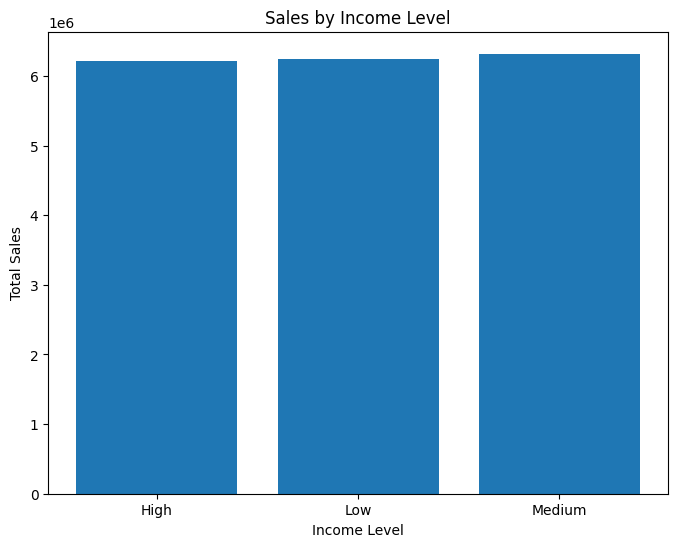

In [2]:
# Exploratory Data Analysis and Visualization

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Exploratory Data Analysis
print(df.head())
print(df.describe())

# Visualize sales by region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(region_sales['Region'], region_sales['Sales'])
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')
plt.show()

# Visualize sales by product category
category_sales = df.groupby('Product Category')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(category_sales['Product Category'], category_sales['Sales'])
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.title('Sales by Product Category')
plt.show()

# Visualize sales by other factors (e.g., income level, climate)
income_sales = df.groupby('Income Level')['Sales'].sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(income_sales['Income Level'], income_sales['Sales'])
plt.xlabel('Income Level')
plt.ylabel('Total Sales')
plt.title('Sales by Income Level')
plt.show()

In [3]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162983 sha256=b461d17ed127073d2ed96fe8ba932dc3a4ac7c464f805bc37df8ab19ef64b16f
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [4]:
# Recommendation System using Collaborative Filtering

import pandas as pd
from surprise import Reader, Dataset, SVD

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Combine columns to create a single item ID
df['ItemID'] = df['Region'] + '_' + df['Product Category'] + '_' + df['Population Density'] + '_' + df['Income Level'] + '_' + df['Climate'] + '_' + df['Season']

# Prepare the data for the surprise library
reader = Reader(rating_scale=(0, 10000))
data = Dataset.load_from_df(df[['Region', 'ItemID', 'Sales']], reader)

# Split the data into training and testing sets
trainset = data.build_full_trainset()

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Make predictions for each region and item combination
predictions = []
for region in df['Region'].unique():
    for item_id in df['ItemID'].unique():
        prediction = algo.predict(region, item_id)
        predictions.append([region, item_id, prediction.est])

# Create a DataFrame from the predictions
recommendations = pd.DataFrame(predictions, columns=['Region', 'ItemID', 'Predicted Sales'])

# Sort the recommendations by predicted sales in descending order
recommendations = recommendations.sort_values(by='Predicted Sales', ascending=False)

# Display the top recommendations for each region
for region in df['Region'].unique():
    print(f"\nTop Recommendations for {region}:")
    print(recommendations[recommendations['Region'] == region].head(3))


Top Recommendations for North:
     Region                                  ItemID  Predicted Sales
0     North  North_Fruits_High_High_Tropical_Spring            10000
1     North  North_Fruits_High_High_Tropical_Summer            10000
2295  North    East_Grains_Low_Low_Temperate_Winter            10000

Top Recommendations for South:
     Region                                  ItemID  Predicted Sales
6911  South        West_Snacks_Low_Low_Polar_Winter            10000
3456  South  North_Fruits_High_High_Tropical_Spring            10000
6910  South        West_Snacks_Low_Low_Polar_Autumn            10000

Top Recommendations for East:
     Region                                  ItemID  Predicted Sales
9220   East    East_Meat_High_High_Temperate_Spring            10000
9209   East  East_Grains_Low_Low_Continental_Summer            10000
9210   East  East_Grains_Low_Low_Continental_Autumn            10000

Top Recommendations for West:
      Region                                  

In [5]:
# Sales Forecasting using Random Forest Regression

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Encode categorical features
df = pd.get_dummies(df, columns=['Region', 'Product Category', 'Population Density', 'Income Level', 'Climate', 'Season'])

# Split the data into features and target
X = df.drop('Sales', axis=1)
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"R-squared score: {score:.2f}")

# Make predictions on the test set
y_pred = model.predict(X_test)
print("Predicted Sales:\n", y_pred[:10])

R-squared score: -0.11
Predicted Sales:
 [5713.29 5875.15 4218.05 6611.9  6192.98 4602.38 5018.79 5244.44 4587.94
 4005.19]


In [6]:
# K-Means for Clustering of Consumers

import pandas as pd
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Preprocess the data for clustering (including encoding categories)
X = df[['Population Density', 'Income Level']]
X = pd.get_dummies(X, drop_first=True)  # Encode categories numerically

# Rename and convert data types (if needed)
X.columns = [f'col_{i}' for i in range(len(X.columns))]
X = X.astype(float)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print(kmeans.cluster_centers_)

# Print the inertia
print(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 3.33333333e-01 -1.88737914e-15  6.66666667e-01 -1.88737914e-15]
 [ 1.60982339e-15  5.00000000e-01  1.60982339e-15  1.00000000e+00]
 [ 1.00000000e+00  1.94289029e-15  1.94289029e-15  5.00000000e-01]
 [ 1.60982339e-15  1.00000000e+00  5.00000000e-01  1.60982339e-15]]
1087.9999999999927


In [7]:
# Market Basket Analysis

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Load the dataset
data = pd.read_csv('food_consumption.csv')

# Update the basket_columns list to match the actual column names in the data DataFrame
basket_columns = data.columns

# Convert the data into a one-hot encoded format
basket = data[basket_columns].applymap(lambda x: 1 if x else 0)

# Perform Apriori analysis
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Print the frequent itemsets
print(frequent_itemsets)

# Print the association rules
print(rules)

     support                                           itemsets
0        1.0                                           (Region)
1        1.0                                 (Product Category)
2        1.0                               (Population Density)
3        1.0                                     (Income Level)
4        1.0                                          (Climate)
..       ...                                                ...
122      1.0  (Climate, Population Density, Product Category...
123      1.0  (Climate, Income Level, Product Category, Sale...
124      1.0  (Climate, Income Level, Population Density, Sa...
125      1.0  (Climate, Income Level, Product Category, Popu...
126      1.0  (Climate, Income Level, Population Density, Pr...

[127 rows x 2 columns]
               antecedents                                        consequents  \
0       (Product Category)                                           (Region)   
1                 (Region)                    

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:
import pandas as pd
import numpy as np

# Define online shopping portals
portals = ['BigBasket', 'Amazon', 'Flipkart', 'Grofers']

# Define product categories
product_categories = ['Fruits', 'Vegetables', 'Dairy', 'Grains', 'Meat', 'Snacks']

# Define product brands
brands = ['Brand A', 'Brand B', 'Brand C', 'Brand D', 'Brand E']

# Define delivery locations
locations = ['North', 'South', 'East', 'West']

# Define ratings
ratings = [1, 2, 3, 4, 5]

# Define discount levels
discount_levels = ['Low', 'Medium', 'High']

# Generate random dataset
data = []
for portal in portals:
    for category in product_categories:
        for brand in brands:
            for location in locations:
                for rating in ratings:
                    for discount in discount_levels:
                        price = np.random.randint(50, 500)
                        orders = np.random.randint(100, 5000)
                        data.append([portal, category, brand, location, rating, discount, price, orders])

df = pd.DataFrame(data, columns=['Portal', 'Product Category', 'Brand', 'Location', 'Rating', 'Discount Level', 'Price', 'Orders'])

# Save the dataset to a CSV file
df.to_csv('online_shopping_data.csv', index=False)
print("Random dataset generated and saved as 'online_shopping_data.csv'")

Random dataset generated and saved as 'online_shopping_data.csv'


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
import pandas as pd
from surprise import Reader, Dataset, SVD

# Load the dataset
df = pd.read_csv('online_shopping_data.csv')

# Combine relevant columns to create a single item ID
df['ItemID'] = df['Product Category'] + '_' + df['Brand'] + '_' + df['Discount Level']

# Prepare the data for the surprise library
reader = Reader(rating_scale=(0, df['Orders'].max()))
data = Dataset.load_from_df(df[['Location', 'ItemID', 'Orders']], reader)

# Split the data into training and testing sets
trainset = data.build_full_trainset()

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Function to get recommendations for a shopkeeper
def get_recommendations():
    shopkeeper_location = input("Enter the shopkeeper's location: ")
    target_region = input("Enter the target region: ")
    brand = input("Enter the brand in demand: ")
    product_category = input("Enter the product category: ")

    recommendations = []
    for discount_level in df['Discount Level'].unique():
        item_id = f"{product_category}_{brand}_{discount_level}"
        prediction = algo.predict(shopkeeper_location, item_id)
        recommendations.append([item_id, prediction.est])

    # Sort the recommendations by predicted orders in descending order
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Filter recommendations for the target region
    filtered_recommendations = [rec for rec in recommendations if rec[0].split('_')[1] == brand and rec[0].split('_')[0] == product_category]

    print(f"\nRecommendations for shopkeeper in {shopkeeper_location} targeting {target_region}:")
    for rec in filtered_recommendations:
        print(f"Item: {rec[0]}, Predicted Orders: {int(rec[1])}")

# Get user input and generate recommendations
get_recommendations()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Enter the shopkeeper's location: West
Enter the target region: East
Enter the brand in demand: Brand B
Enter the product category: Vegetables

Recommendations for shopkeeper in West targeting East:
Item: Vegetables_Brand B_Low, Predicted Orders: 4999
Item: Vegetables_Brand B_Medium, Predicted Orders: 4999
Item: Vegetables_Brand B_High, Predicted Orders: 4999


In [30]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('food_consumption.csv')

# Exploratory Data Analysis and Visualization
# ... (Existing code for EDA and visualization)

# Recommendation System using Collaborative Filtering
# Combine columns to create a single item ID
df['ItemID'] = df['Region'] + '_' + df['Product Category'] + '_' + df['Population Density'] + '_' + df['Income Level'] + '_' + df['Climate'] + '_' + df['Season']

# Prepare the data for the surprise library
reader = Reader(rating_scale=(0, 10000))
data = Dataset.load_from_df(df[['Region', 'ItemID', 'Sales']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Calculate performance metrics for the SVD model
predictions = algo.test(testset)

# RMSE (Root Mean Squared Error)
rmse_svd = accuracy.rmse(predictions)
print(f"RMSE for SVD: {rmse_svd:.2f}")

# MAE (Mean Absolute Error)
mae_svd = accuracy.mae(predictions)
print(f"MAE for SVD: {mae_svd:.2f}")

# FCP (Fraction of Concordant Pairs)
fcp_svd = accuracy.fcp(predictions)
print(f"FCP for SVD: {fcp_svd:.2f}")

# Evaluate the SVD model using scikit-learn metrics
y_true = [rating for _, _, rating in testset]
y_pred = [algo.predict(uid, iid).est for uid, iid, _ in testset]

mse_svd = mean_squared_error(y_true, y_pred)
print(f"MSE for SVD: {mse_svd:.2f}")

mae_svd_sklearn = mean_absolute_error(y_true, y_pred)
print(f"MAE for SVD (scikit-learn): {mae_svd_sklearn:.2f}")

# Online Shopping Data
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy

# Load the dataset
df = pd.read_csv('online_shopping_data.csv')

# Combine relevant columns to create a single item ID
df['ItemID'] = df['Product Category'] + '_' + df['Brand'] + '_' + df['Discount Level']

# Prepare the data for the surprise library
reader = Reader(rating_scale=(0, df['Orders'].max()))
data = Dataset.load_from_df(df[['Location', 'ItemID', 'Orders']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Calculate performance metrics
predictions = algo.test(testset)

# RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse:.2f}")

# MAE (Mean Absolute Error)
mae = accuracy.mae(predictions)
print(f"MAE: {mae:.2f}")

# FCP (Fraction of Concordant Pairs)
fcp = accuracy.fcp(predictions)
print(f"FCP: {fcp:.2f}")

# Prepare the online shopping data for the surprise library
reader = Reader(rating_scale=(0, df['Orders'].max()))
data = Dataset.load_from_df(df[['Location', 'ItemID', 'Orders']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Train the SVD model
algo = SVD()
algo.fit(trainset)

# Calculate performance metrics for the SVD model on the online shopping data
predictions = algo.test(testset)

# RMSE (Root Mean Squared Error)
rmse_svd_online = accuracy.rmse(predictions)
print(f"RMSE for SVD on online shopping data: {rmse_svd_online:.2f}")

# MAE (Mean Absolute Error)
mae_svd_online = accuracy.mae(predictions)
print(f"MAE for SVD on online shopping data: {mae_svd_online:.2f}")

# FCP (Fraction of Concordant Pairs)
fcp_svd_online = accuracy.fcp(predictions)
print(f"FCP for SVD on online shopping data: {fcp_svd_online:.2f}")

# Evaluate the SVD model using scikit-learn metrics
y_true = [rating for _, _, rating in testset]
y_pred = [algo.predict(uid, iid).est for uid, iid, _ in testset]

mse_svd_online = mean_squared_error(y_true, y_pred)
print(f"MSE for SVD on online shopping data: {mse_svd_online:.2f}")

mae_svd_online_sklearn = mean_absolute_error(y_true, y_pred)
print(f"MAE for SVD on online shopping data (scikit-learn): {mae_svd_online_sklearn:.2f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


RMSE: 5252.0044
RMSE for SVD: 5252.00
MAE:  4545.0072
MAE for SVD: 4545.01
FCP:  0.0000
FCP for SVD: 0.00
MSE for SVD: 27583550.06
MAE for SVD (scikit-learn): 4545.01
RMSE: 2849.0304
RMSE: 2849.03
MAE:  2479.4972
MAE: 2479.50
FCP:  0.0000
FCP: 0.00
RMSE: 2868.9605
RMSE for SVD on online shopping data: 2868.96
MAE:  2495.3701
MAE for SVD on online shopping data: 2495.37
FCP:  0.0000
FCP for SVD on online shopping data: 0.00
MSE for SVD on online shopping data: 8230934.51
MAE for SVD on online shopping data (scikit-learn): 2495.37
